<img>
<html>
  <head>
  </head>

  <body>
    <img src="image/12.jpg">
  </body>
</html>

<a id="library"></a>
<div style="background-color:#3C0753; padding:10px; border-radius:8px; color:white; text-align:center; font-weight:bold; margin:0;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;"></span> Intro of the Data
    </h2>
</div>


# PJM Hourly Energy Consumption Data

## About the Dataset  
**PJM Interconnection LLC (PJM)** is a **regional transmission organization (RTO)** in the **United States**. It operates as part of the **Eastern Interconnection grid**, managing an **electric transmission system** serving multiple states and regions.  

## Covered Regions  
The dataset includes data from the following states and districts:  

- Delaware  
- Illinois  
- Indiana  
- Kentucky  
- Maryland  
- Michigan  
- New Jersey  
- North Carolina  
- Ohio  
- Pennsylvania  
- Tennessee  
- Virginia  
- West Virginia  
- District of Columbia  

## Data Description  
- The dataset contains **hourly power consumption data** collected from PJM’s official website.  
- All values are measured in **megawatts (MW)**.  
- **Important:** The regions have changed over the years, so **data availability may vary** by date and location.  

---

- **About the author:** Sajjad Ali Shah
- **LinkedIn:** [LinkedIn Profile](https://www.linkedin.com/in/sajjad-ali-shah47/)
- **Dataset link:** [Hourly Energy Consumption](https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption/data)

---

<a id="library"></a>
<div style="background-color:#3C0753; padding:10px; border-radius:8px; color:white; text-align:center; font-weight:bold; margin:0;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;"></span> Import Library
    </h2>
</div>


In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
PJME_hourly=pd.read_csv('./Data/PJME_hourly.csv',index_col=[0],parse_dates=[0])
AEP_hourly=pd.read_csv('./Data/AEP_hourly.csv',index_col=[0],parse_dates=[0])
COMED_hourly=pd.read_csv('./Data/COMED_hourly.csv',index_col=[0],parse_dates=[0])
AEP_hourly=pd.read_csv('./Data/AEP_hourly.csv',index_col=[0],parse_dates=[0])
FE_hourly=pd.read_csv('./Data/FE_hourly.csv')
PJMW_hourly=pd.read_csv('./Data/PJMW_hourly.csv',index_col=[0],parse_dates=[0])
DEOK_hourly=pd.read_csv('./Data/DEOK_hourly.csv',index_col=[0],parse_dates=[0])
NI_hourly=pd.read_csv('./Data/NI_hourly.csv',index_col=[0],parse_dates=[0])


In [2]:
# Load all datasets (adjust paths as needed)
data_files = {
    'PJME': './Data/PJME_hourly.csv',
    'AEP': './Data/AEP_hourly.csv',
    'COMED': './Data/COMED_hourly.csv',
    'FE': './Data/FE_hourly.csv',
    'PJMW': './Data/PJMW_hourly.csv',
    'DEOK': './Data/DEOK_hourly.csv',
    'NI': './Data/NI_hourly.csv'
}

# Dictionary to store DataFrames
data = {}
for region, file in data_files.items():
    data[region] = pd.read_csv(file, index_col=[0], parse_dates=[0])

In [3]:
for region, df in data.items():
    print(f"{region} Stats:")
    print(df.describe())

PJME Stats:
             PJME_MW
count  145366.000000
mean    32080.222831
std      6464.012166
min     14544.000000
25%     27573.000000
50%     31421.000000
75%     35650.000000
max     62009.000000
AEP Stats:
              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000
COMED Stats:
           COMED_MW
count  66497.000000
mean   11420.152112
std     2304.139517
min     7237.000000
25%     9780.000000
50%    11152.000000
75%    12510.000000
max    23753.000000
FE Stats:
              FE_MW
count  62874.000000
mean    7792.159064
std     1331.268006
min        0.000000
25%     6807.000000
50%     7700.000000
75%     8556.000000
max    14032.000000
PJMW Stats:
             PJMW_MW
count  143206.000000
mean     5602.375089
std       979.142872
min       487.000000
25%      4907.000000
50%      5530.000000
75%      6252.000000
max      9594.000000
DEOK Stats:
   

d:\Anaconda Installation\envs\Rec_sys_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


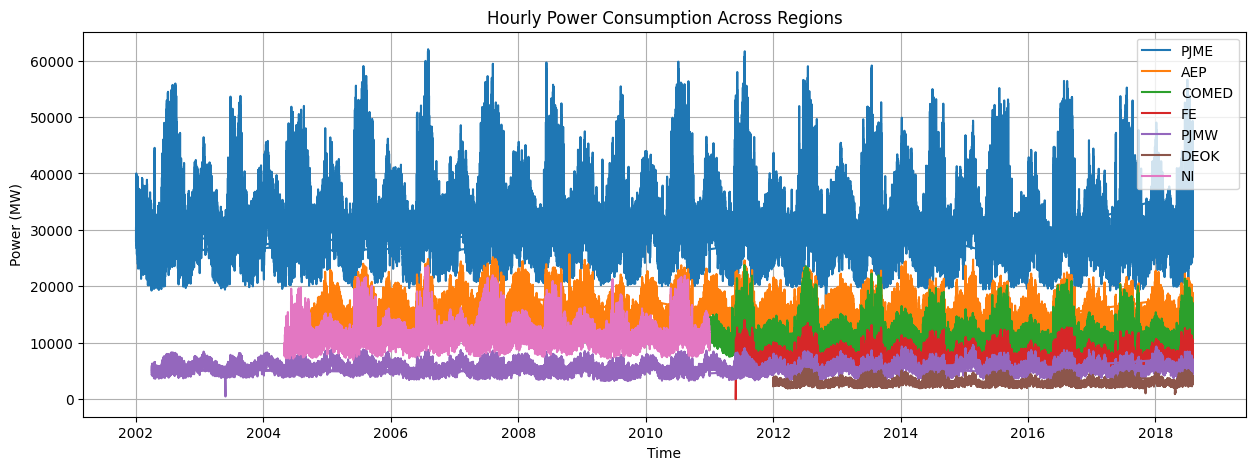

In [4]:
plt.figure(figsize=(15, 5))
for region, df in data.items():
    plt.plot(df.index, df[f'{region}_MW'], label=region)
plt.title('Hourly Power Consumption Across Regions')
plt.xlabel('Time')
plt.ylabel('Power (MW)')
plt.legend()
plt.grid(True)
plt.show()

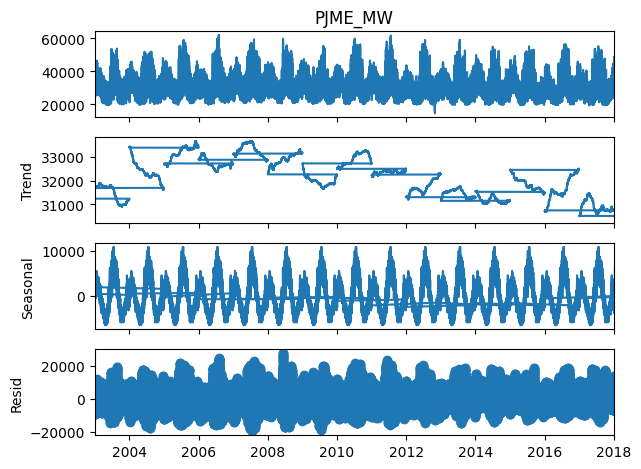

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['PJME']['PJME_MW'], period=24*365)  # Yearly seasonality
decomposition.plot()
plt.show()

In [6]:
for region, df in data.items():
    df['Year'] = df.index.year
    df['Month'] = df.index.month
    df['Day'] = df.index.day
    df['Hour'] = df.index.hour
    df['DayOfWeek'] = df.index.dayofweek

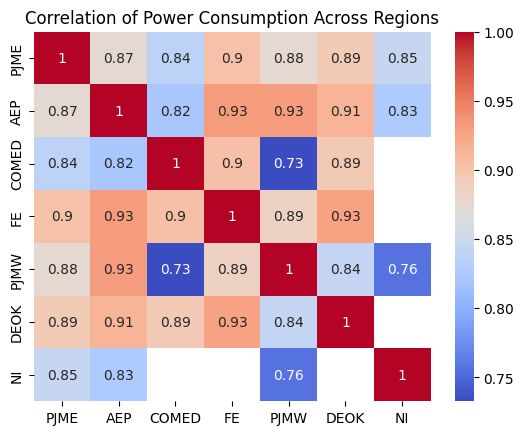

In [9]:
# Combine all regions' MW columns into a single DataFrame, aligning on the DatetimeIndex
combined = pd.concat(
    [df.loc[~df.index.duplicated(), f'{region}_MW'].rename(region) for region, df in data.items()],
    axis=1,
    join='outer'
)
correlation = combined.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation of Power Consumption Across Regions')
plt.show()

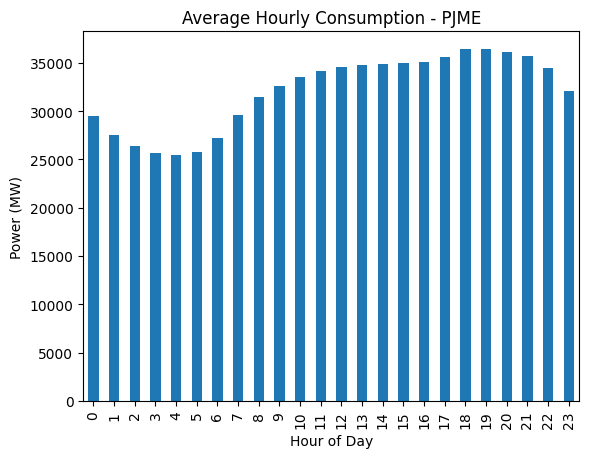

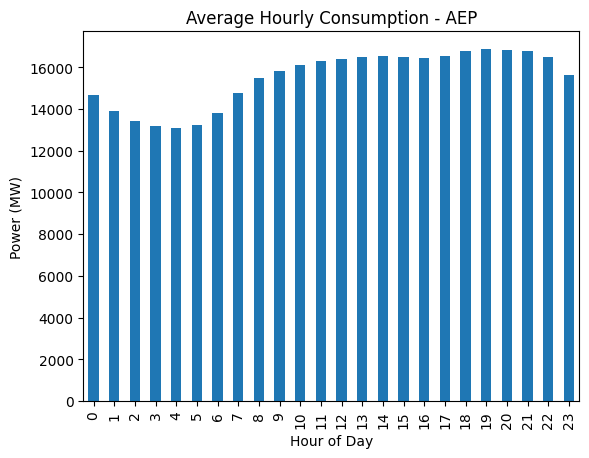

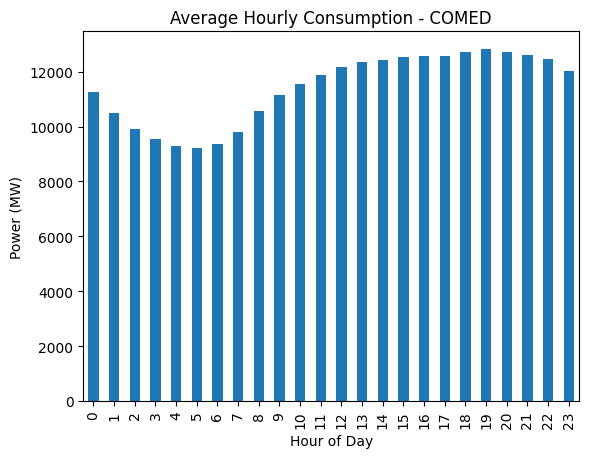

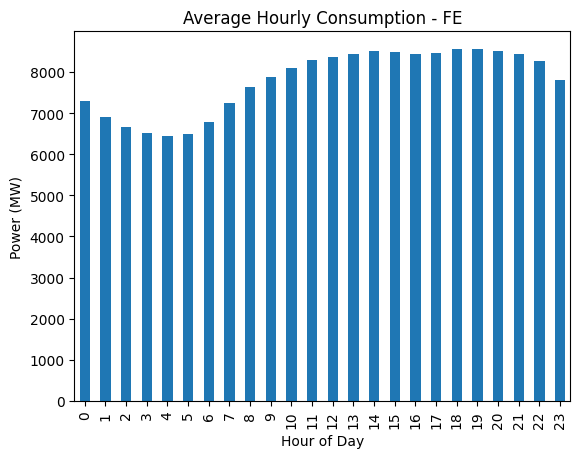

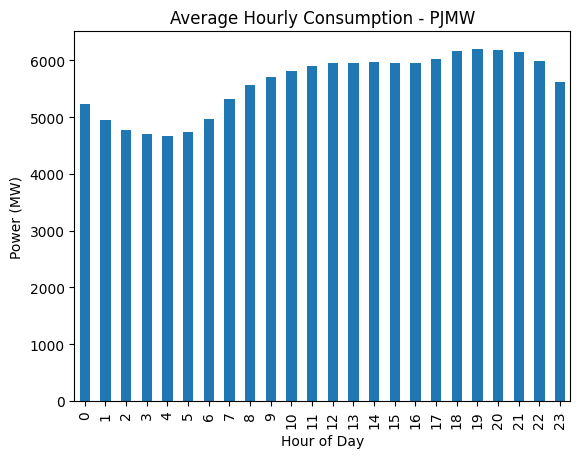

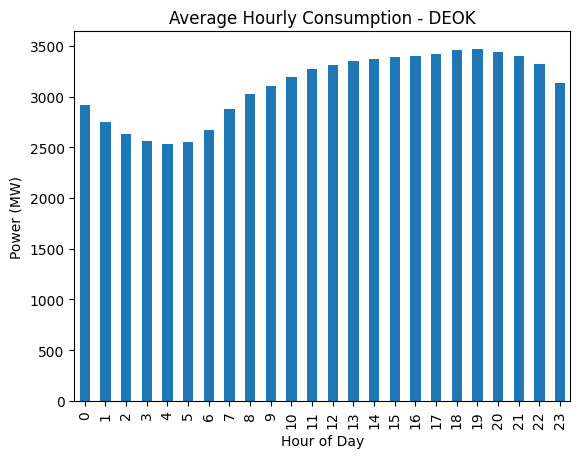

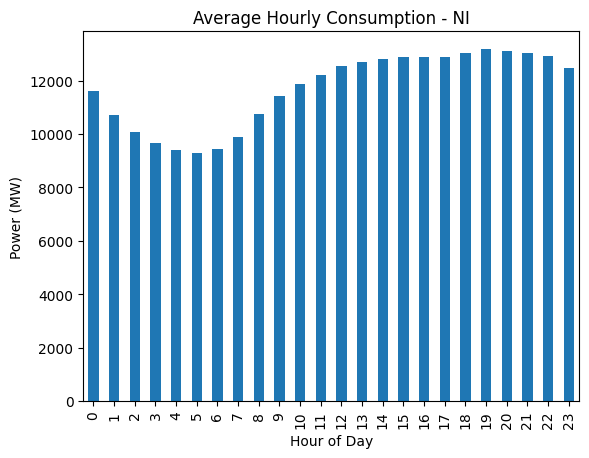

In [10]:
for region, df in data.items():
    peak_hour = df.groupby('Hour')[f'{region}_MW'].mean()
    peak_hour.plot(kind='bar', title=f'Average Hourly Consumption - {region}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Power (MW)')
    plt.show()

d:\Anaconda Installation\envs\Rec_sys_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda Installation\envs\Rec_sys_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda Installation\envs\Rec_sys_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda Installation\envs\Rec_sys_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting

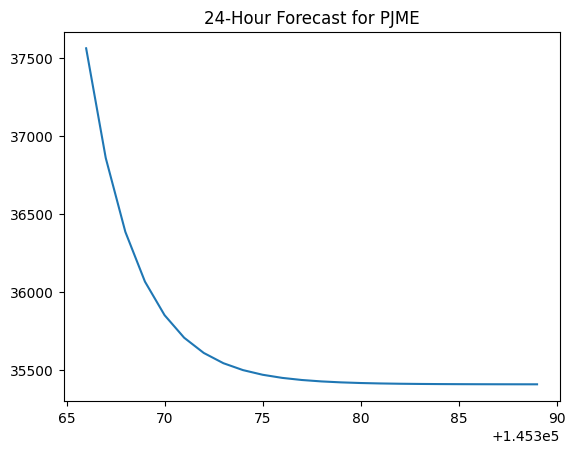

In [11]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['PJME']['PJME_MW'], order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=24)
plt.plot(forecast)
plt.title('24-Hour Forecast for PJME')
plt.show()